## Advanced Lane Finding Project

The goals / steps of this project are the following:

- ~~Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.~~
- ~~Apply a distortion correction to raw images.~~
- Use color transforms, gradients, etc., to create a thresholded binary image.
- Apply a perspective transform to rectify binary image ("birds-eye view").
- Detect lane pixels and fit to find the lane boundary.
- Determine the curvature of the lane and vehicle position with respect to center.
- Warp the detected lane boundaries back onto the original image.
- Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

---
## First, lets get the camera sorted - camera calibation, here we go:

In [ ]:
import matplotlib
matplotlib.use('qt5agg')

In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
%matplotlib qt

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('camera_cal/calibration*.jpg')

# Step through the list and search for chessboard corners
for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6),None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

## And here we are saving the precious distortion file:

In [2]:
import pickle
%matplotlib inline

# Test undistortion on an image
img = cv2.imread('test_images/test1.jpg')
img_size = (img.shape[1], img.shape[0])

# Do camera calibration given object points and image points
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)

# dst = cv2.undistort(img, mtx, dist, None, mtx)
# cv2.imwrite('output_images/test1_undist.jpg',dst)

# Save the camera calibration result for later use
dist_pickle = {}
dist_pickle["mtx"] = mtx
dist_pickle["dist"] = dist
pickle.dump( dist_pickle, open( "camera_cal/distortion_matrix_pickle.p", "wb" ) )

## Here we go through all test images to undistort and show them

### Undistort and save:

In [5]:
# Step through the list of test images and save the undistorted variants:
for fname in glob.glob('test_images/*.jpg'):
    img = cv2.imread(fname)
    dst = cv2.undistort(img, mtx, dist, None, mtx)
    cv2.imwrite('output_images/undist_' + fname.split('\\')[1], dst)

### Read, convert to rgb and show the test images

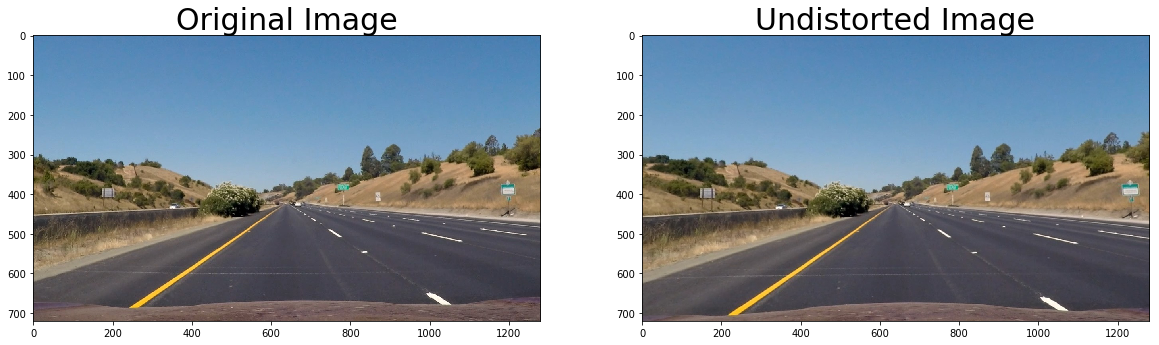

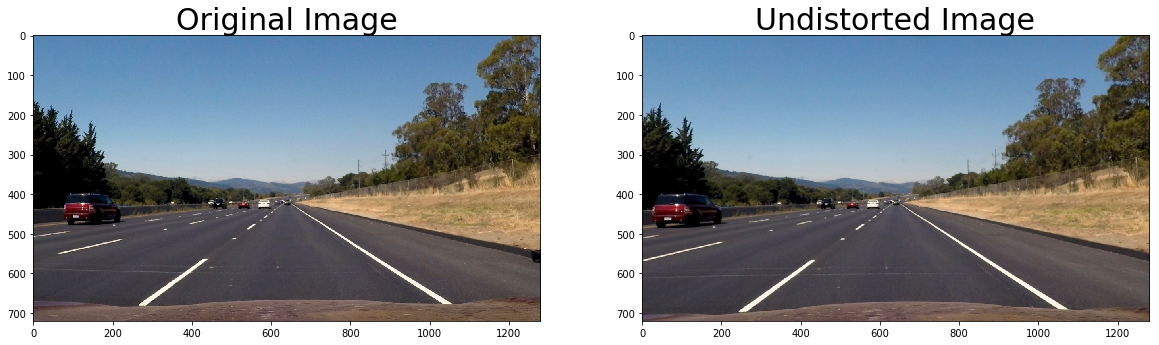

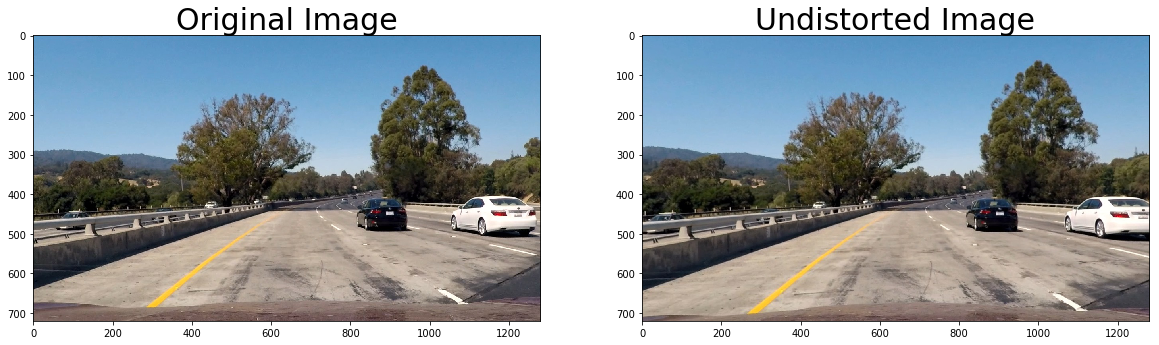

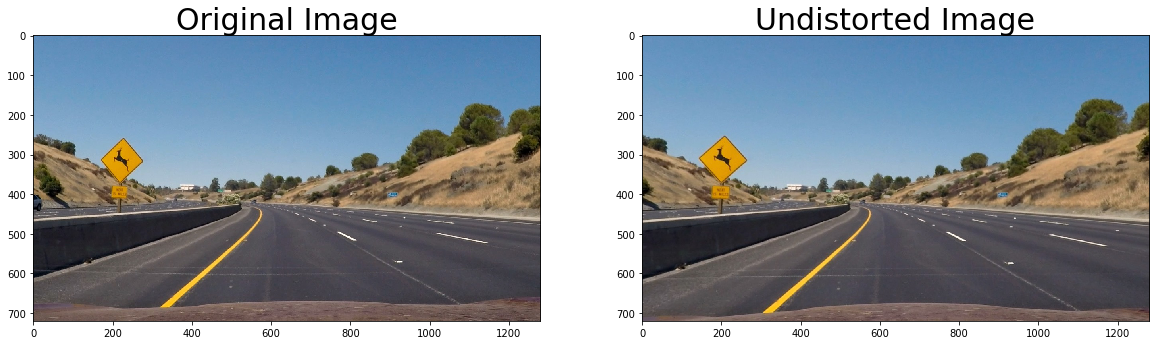

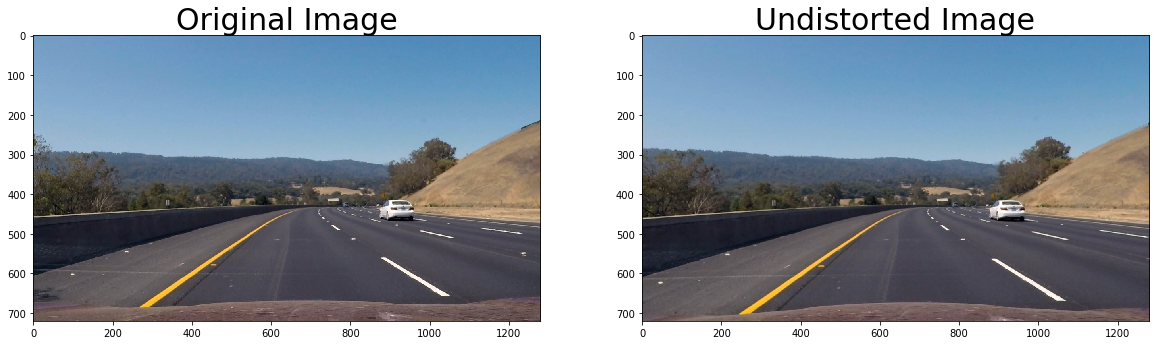

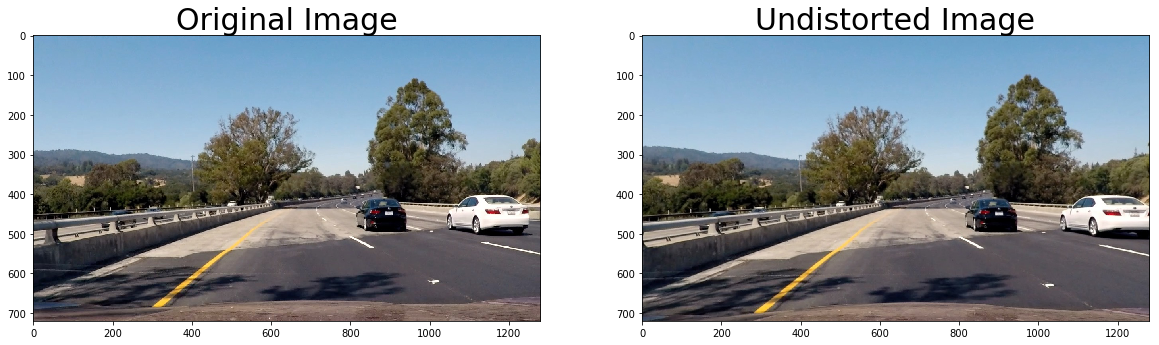

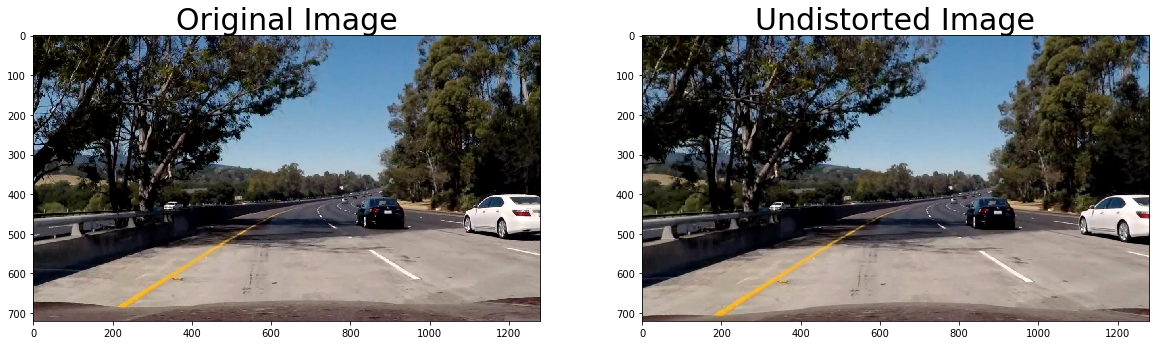

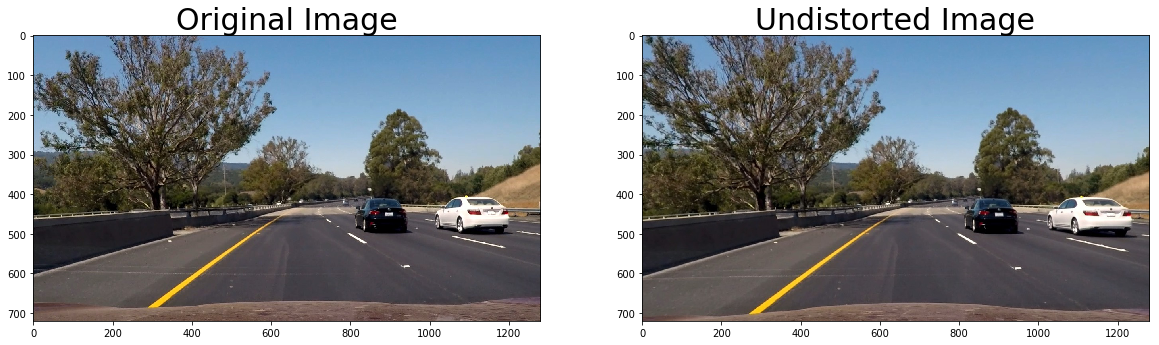

In [6]:
# Step through the list and show the images in all their glory:
for fname in glob.glob('test_images/*.jpg'):
    img = cv2.imread(fname)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    dst = cv2.imread('output_images/undist_' + fname.split('\\')[1])
    dst = cv2.cvtColor(dst,cv2.COLOR_BGR2RGB)
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
    ax1.imshow(img)
    ax1.set_title('Original Image', fontsize=30)
    ax2.imshow(dst)
    ax2.set_title('Undistorted Image', fontsize=30)

### Thats it folks for today. 

Thats it, it was an easy part but as well the one with the less wiggle room. It is clear and the results can be objectivelly measured as good or bad. Future improvements will include wrapping the calibration process into a function that will take the list of chessboard images and will output a dictionary with the distortion coeficients and distortion matrix. Would be nice to abstract the IO part so that the files are not necesarily loaded from disk, maybe python generators would be handy?. Anyway, really happy to finish this part, this project timeline keeps me in tonus.